# **AN츼LISIS ESTAD칈STICO DESCRIPTIVO - TABLA RELACIONAL**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')

In [2]:
# Cargar los datasets
clientes = pd.read_csv('../Base_de_datos_limpia/Clientes_limpio.csv')
ventas = pd.read_csv('../Base_de_datos_limpia/Ventas_limpio.csv')
detalle_ventas = pd.read_csv('../Base_de_datos_limpia/Detalle_ventas_limpio.csv')
productos = pd.read_csv('../Base_de_datos_limpia/Productos_limpio.csv')

# 1. Unir Ventas con Clientes (para tener info del cliente en cada venta)
ventas_clientes = pd.merge(ventas, clientes, on='id_cliente', how='left')

# 2. Unir Detalle de Ventas con Productos (para tener info del producto)
detalle_productos = pd.merge(detalle_ventas, productos, on='id_producto', how='left')

# 3. Unir todo junto: Ventas + Clientes + Detalle + Productos
analisis_relacional = pd.merge(detalle_productos, ventas_clientes, on='id_venta', how='left')

# Ahora analisis_relacional contiene:
# - Datos del cliente (nombre, ciudad, fecha_alta)
# - Datos de la venta (fecha, a침o, mes, m칠todo de pago)
# - Datos del producto (nombre, categor칤a, precio)
# - Detalle de cantidad e importe
print(analisis_relacional.head())


   id_venta  id_producto  cantidad  precio_unitario_x  importe  \
0         1           90         1               2902     2902   
1         2           82         5               2394    11970   
2         2           39         5                469     2345   
3         2           70         2               4061     8122   
4         2           22         1               2069     2069   

         nombre_producto  precio_unitario_y  cat_Alimentos  cat_Limpieza  \
0    Toallas H칰medas X50               2902              0             1   
1  Aceitunas Negras 200G               2394              0             1   
2     Helado Vainilla 1L                469              1             0   
3           Fernet 750Ml               4061              0             1   
4  Medialunas De Manteca               2069              0             1   

        fecha  ...  mes_venta  pago_Efectivo  pago_Qr  pago_Tarjeta  \
0  2024-06-19  ...          6              0        0             1   
1  2

## ***Inspecci칩n general***

In [5]:
print("Primeras filas del dataset relacional:")
display(analisis_relacional.head())

print("\nInformaci칩n general:")
print(analisis_relacional.info())

Primeras filas del dataset relacional:


id_venta  id_producto  cantidad  precio_unitario_x  importe  \
0         1           90         1               2902     2902   
1         2           82         5               2394    11970   
2         2           39         5                469     2345   
3         2           70         2               4061     8122   
4         2           22         1               2069     2069   

         nombre_producto  precio_unitario_y  cat_Alimentos  cat_Limpieza  \
0    Toallas H칰medas X50               2902              0             1   
1  Aceitunas Negras 200G               2394              0             1   
2     Helado Vainilla 1L                469              1             0   
3           Fernet 750Ml               4061              0             1   
4  Medialunas De Manteca               2069              0             1   

        fecha  ...  mes_venta  pago_Efectivo  pago_Qr  pago_Tarjeta  \
0  2024-06-19  ...          6              0        0             1   
1  2024-03-17  ...          3              0        1             0   
2  2024-03-17  ...          3              0        1             0   
3  2024-03-17  ...          3              0        1             0   
4  2024-03-17  ...          3              0        1             0   

   pago_Transferencia    nombre_cliente                      email  \
0                   0  Guadalupe Romero  guadalupe.romero@mail.com   
1                   0      Olivia Gomez      olivia.gomez@mail.com   
2                   0      Olivia Gomez      olivia.gomez@mail.com   
3                   0      Olivia Gomez      olivia.gomez@mail.com   
4                   0      Olivia Gomez      olivia.gomez@mail.com   

       ciudad  fecha_alta mes_alta  
0  Carlos Paz  2023-03-03        3  
1  Rio Cuarto  2023-02-18        2  
2  Rio Cuarto  2023-02-18        2  
3  Rio Cuarto  2023-02-18        2  
4  Rio Cuarto  2023-02-18        2  

[5 rows x 22 columns]


Informaci칩n general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_venta            343 non-null    int64 
 1   id_producto         343 non-null    int64 
 2   cantidad            343 non-null    int64 
 3   precio_unitario_x   343 non-null    int64 
 4   importe             343 non-null    int64 
 5   nombre_producto     343 non-null    object
 6   precio_unitario_y   343 non-null    int64 
 7   cat_Alimentos       343 non-null    int64 
 8   cat_Limpieza        343 non-null    int64 
 9   fecha               343 non-null    object
 10  id_cliente          343 non-null    int64 
 11  a침o_venta           343 non-null    int64 
 12  mes_venta           343 non-null    int64 
 13  pago_Efectivo       343 non-null    int64 
 14  pago_Qr             343 non-null    int64 
 15  pago_Tarjeta        343 non-null    int64 
 16  pago

## ***Estad칤sticas descriptivas generales***

In [6]:
# Asegurarse que columnas num칠ricas sean tipo float/int
cols_numericas = ['cantidad','precio_unitario_x','importe']
for col in cols_numericas:
    analisis_relacional[col] = pd.to_numeric(analisis_relacional[col], errors='coerce')

analisis_relacional = analisis_relacional.dropna(subset=cols_numericas)

print("\n游늵 Estad칤sticas descriptivas generales:")
display(analisis_relacional[cols_numericas].describe())



游늵 Estad칤sticas descriptivas generales:


cantidad  precio_unitario_x       importe
count  343.000000         343.000000    343.000000
mean     2.962099        2654.495627   7730.078717
std      1.366375        1308.694720   5265.543077
min      1.000000         272.000000    272.000000
25%      2.000000        1618.500000   3489.000000
50%      3.000000        2512.000000   6702.000000
75%      4.000000        3876.000000  10231.500000
max      5.000000        4982.000000  24865.000000

## ***Top productos por cantidad e importe***


Top 10 productos por cantidad vendida:
nombre_producto
Salsa De Tomate 500G          27
Queso Rallado 150G            26
Hamburguesas Congeladas X4    24
Vino Blanco 750Ml             22
Aceitunas Verdes 200G         22
Mermelada De Frutilla 400G    21
Lavandina 1L                  21
Ron 700Ml                     21
Pizza Congelada Muzzarella    20
Yerba Mate Suave 1Kg          20
Name: cantidad, dtype: int64

Top 10 productos por importe total:
nombre_producto
Desodorante Aerosol           93800
Queso Rallado 150G            89544
Pizza Congelada Muzzarella    85720
Ron 700Ml                     81396
Yerba Mate Suave 1Kg          77560
Energ칠tica Nitro 500Ml        71706
Chicle Menta                  68628
Caramelos Masticables         66528
Vino Blanco 750Ml             59048
Hamburguesas Congeladas X4    58080
Name: importe, dtype: int64


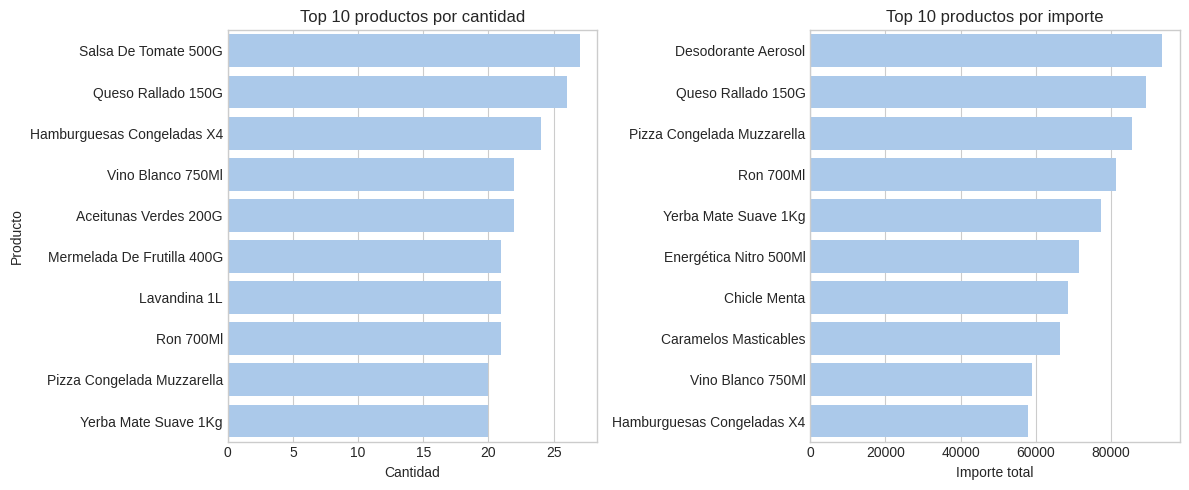

In [ ]:
top_productos_cantidad = analisis_relacional.groupby('nombre_producto')['cantidad'].sum().sort_values(ascending=False).head(10)
top_productos_importe = analisis_relacional.groupby('nombre_producto')['importe'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 productos por cantidad vendida:")
print(top_productos_cantidad)

print("\nTop 10 productos por importe total:")
print(top_productos_importe)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.barplot(x=top_productos_cantidad.values, y=top_productos_cantidad.index)
plt.title('Top 10 productos por cantidad')
plt.xlabel('Cantidad')
plt.ylabel('Producto')

plt.subplot(1,2,2)
sns.barplot(x=top_productos_importe.values, y=top_productos_importe.index)
plt.title('Top 10 productos por importe')
plt.xlabel('Importe total')
plt.ylabel('')
plt.tight_layout()
plt.show()

**El gr치fico de la izquierda muestra los 10 productos m치s populares (m치s vendidos en cantidad de unidades), mientras que el gr치fico de la derecha muestra los 10 productos m치s rentables (los que generaron mayor ingreso total).**

**Estos gr치ficos permiten ver que el producto m치s vendido (Salsa de Tomate) no es necesariamente el que m치s dinero genera (Desodorante Aerosol).**

## ***Top clientes por gasto total***


Top 10 clientes por gasto total:
nombre_cliente
Agustina Flores       132158
Bruno Castro          118790
Bruno Diaz             90701
Diego Diaz             90522
Karina Castro          81830
Mariana Lopez          72448
Olivia Gomez           71321
Guadalupe Martinez     67959
Pablo Sanchez          67575
Camila Rodriguez       65001
Name: importe, dtype: int64


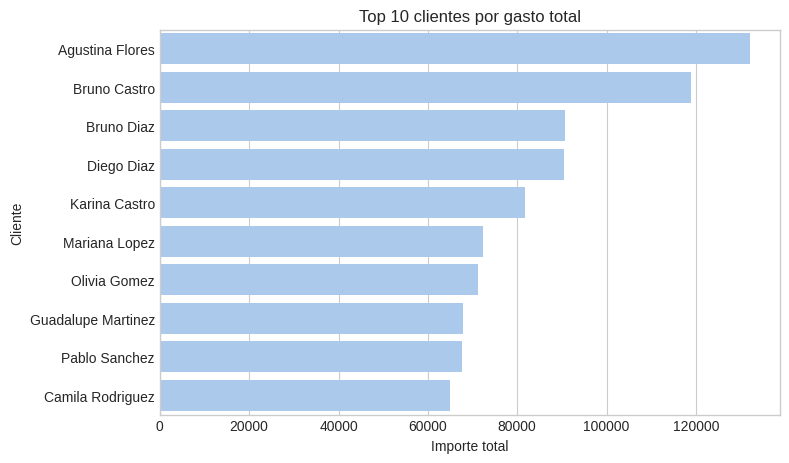

In [ ]:
gasto_por_cliente = analisis_relacional.groupby('nombre_cliente')['importe'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 clientes por gasto total:")
print(gasto_por_cliente)

plt.figure(figsize=(8,5))
sns.barplot(x=gasto_por_cliente.values, y=gasto_por_cliente.index)
plt.title('Top 10 clientes por gasto total')
plt.xlabel('Importe total')
plt.ylabel('Cliente')
plt.show()

**Este gr치fico identifica a los 10 clientes que m치s dinero han gastado en el negocio, orden치ndolos por su "Importe total". Permite ver de forma sencilla qui칠nes son los clientes m치s importantes en t칠rminos de ingresos, destacando a "Agustina Flores" como la clienta n칰mero uno.**

## ***Distribuci칩n por ciudad y categor칤a***


Ventas por ciudad:
ciudad
Rio Cuarto     792203
Alta Gracia    481504
Cordoba        481482
Carlos Paz     353852
Villa Maria    313350
Mendiolaza     229026
Name: importe, dtype: int64

Ventas por categor칤a Alimentos (0=No,1=S칤):
cat_Alimentos
0    1436281
1    1215136
Name: importe, dtype: int64

Ventas por categor칤a Limpieza (0=No,1=S칤):
cat_Limpieza
0    1215136
1    1436281
Name: importe, dtype: int64


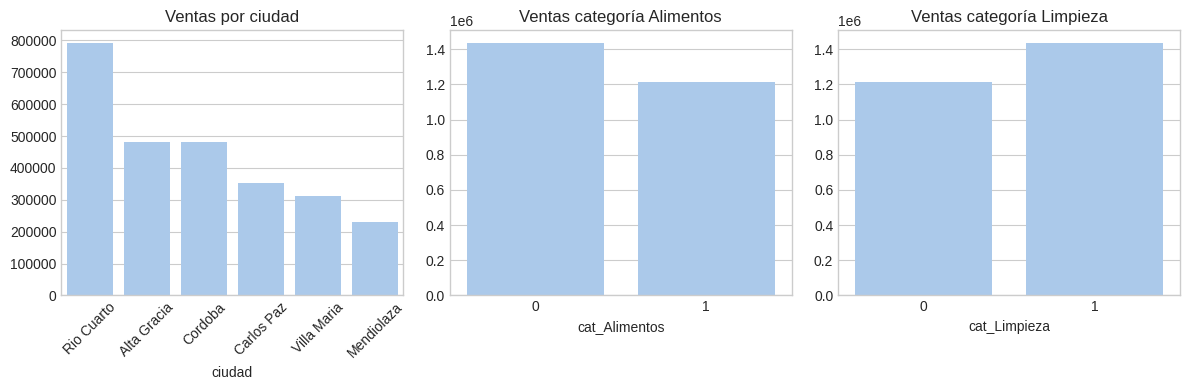

In [9]:
ventas_por_ciudad = analisis_relacional.groupby('ciudad')['importe'].sum().sort_values(ascending=False)
ventas_alimentos = analisis_relacional.groupby('cat_Alimentos')['importe'].sum()
ventas_limpieza = analisis_relacional.groupby('cat_Limpieza')['importe'].sum()

print("\nVentas por ciudad:")
print(ventas_por_ciudad)
print("\nVentas por categor칤a Alimentos (0=No,1=S칤):")
print(ventas_alimentos)
print("\nVentas por categor칤a Limpieza (0=No,1=S칤):")
print(ventas_limpieza)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
sns.barplot(x=ventas_por_ciudad.index, y=ventas_por_ciudad.values)
plt.xticks(rotation=45)
plt.title('Ventas por ciudad')

plt.subplot(1,3,2)
sns.barplot(x=ventas_alimentos.index, y=ventas_alimentos.values)
plt.title('Ventas categor칤a Alimentos')

plt.subplot(1,3,3)
sns.barplot(x=ventas_limpieza.index, y=ventas_limpieza.values)
plt.title('Ventas categor칤a Limpieza')

plt.tight_layout()
plt.show()


**El gr치fico de la izquierda ("Ventas por ciudad") muestra qu칠 ciudades generan m치s ingresos, siendo "R칤o Cuarto" la m치s importante.**

**Los dos gr치ficos de la derecha comparan las ventas totales de las categor칤as "Alimentos" y "Limpieza".**

## ***M칠todos de pago***


N칰mero de ventas por m칠todo de pago:
pago_Efectivo         111
pago_Qr                91
pago_Tarjeta           69
pago_Transferencia     72
dtype: int64


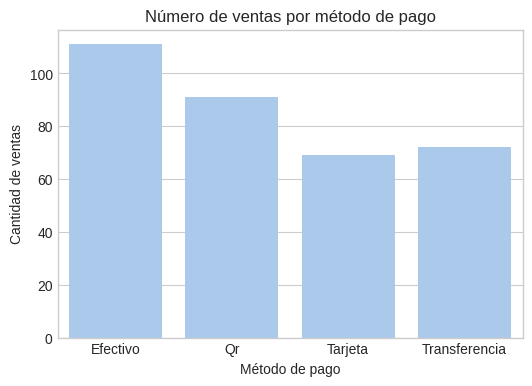

In [21]:

metodos_pago = ['pago_Efectivo','pago_Qr','pago_Tarjeta','pago_Transferencia']
ventas_por_metodo = analisis_relacional[metodos_pago].sum()

print("\nN칰mero de ventas por m칠todo de pago:")
print(ventas_por_metodo)

plt.figure(figsize=(6,4))
sns.barplot(x=ventas_por_metodo.index.str.replace('pago_',''), y=ventas_por_metodo.values)
plt.title('N칰mero de ventas por m칠todo de pago')
plt.ylabel('Cantidad de ventas')
plt.xlabel('M칠todo de pago')
plt.show()

**Este gr치fico de barras compara la popularidad de los diferentes m칠todos de pago, mostrando cu치ntas ventas individuales se realizaron con cada uno. Se puede ver que el "Efectivo" es el m칠todo m치s frecuente (m치s de 100 ventas), seguido por "Qr", mientras que "Tarjeta" y "Transferencia" son los menos comunes.**

## ***Tendencias temporales***

Text(0, 0.5, 'Importe total')

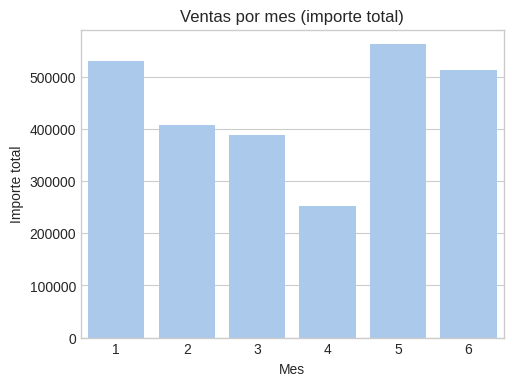

In [12]:
# Total de ventas por mes
ventas_por_mes = analisis_relacional.groupby('mes_venta')['importe'].sum()

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title('Ventas por mes (importe total)')
plt.xlabel('Mes')
plt.ylabel('Importe total')

**Este gr치fico muestra el importe total de las ventas para cada uno de los primeros seis meses. Permite comparar el rendimiento entre ellos, identificando f치cilmente el mes con m치s ventas (el 5) y el mes con menos ventas (el 4).**

## ***Scatter plots para explorar relaciones***

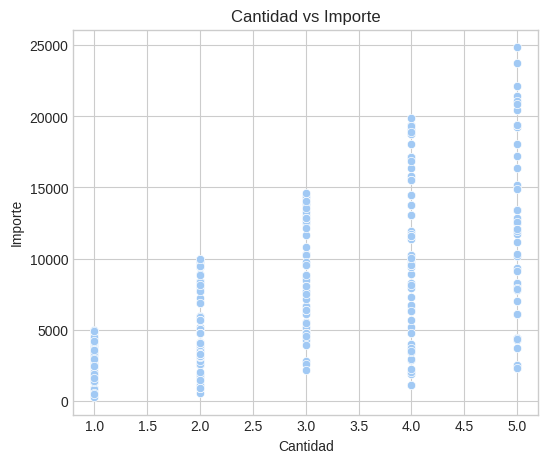

In [3]:
# Cantidad vs Importe
plt.figure(figsize=(6,5))
sns.scatterplot(x='cantidad', y='importe', data=analisis_relacional)
plt.title('Cantidad vs Importe')
plt.xlabel('Cantidad')
plt.ylabel('Importe')
plt.show()

**El primer gr치fico de dispersi칩n muestra la relaci칩n entre la cantidad de productos comprados (en el eje X) y el importe total de esas compras (en el eje Y). Se puede ver que las cantidades son n칰meros enteros (1, 2, 3, 4, 5) y que para cada cantidad existe una variedad de importes diferentes, aunque tienden a ser m치s altos a medida que aumenta la cantidad. La dispersi칩n vertical de los puntos indica que, aunque la cantidad sea la misma, el Precio unitario es diferente en cada transacci칩n.**

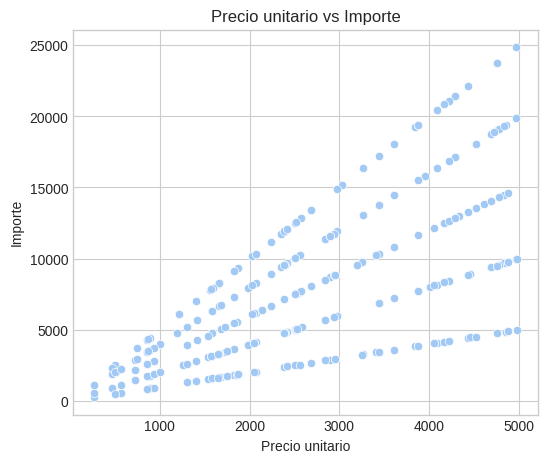

In [4]:
# Precio unitario vs Importe
plt.figure(figsize=(6,5))
sns.scatterplot(x='precio_unitario_x', y='importe', data=analisis_relacional)
plt.title('Precio unitario vs Importe')
plt.xlabel('Precio unitario')
plt.ylabel('Importe')
plt.show()

**El segundo gr치fico de dispersi칩n relaciona el precio unitario de un art칤culo (en el eje X) con el importe total de la transacci칩n (en el eje Y). Lo m치s interesante es que los puntos forman l칤neas rectas diagonales muy claras. Cada una de esas l칤neas representa una cantidad espec칤fica de art칤culos comprados; la l칤nea inferior son compras de 1 art칤culo (donde Importe = Precio unitario * 1), la siguiente l칤nea son compras de 2 art칤culos (Importe = Precio unitario * 2), y as칤 sucesivamente.**

## ***Histogramas de variables num칠ricas***

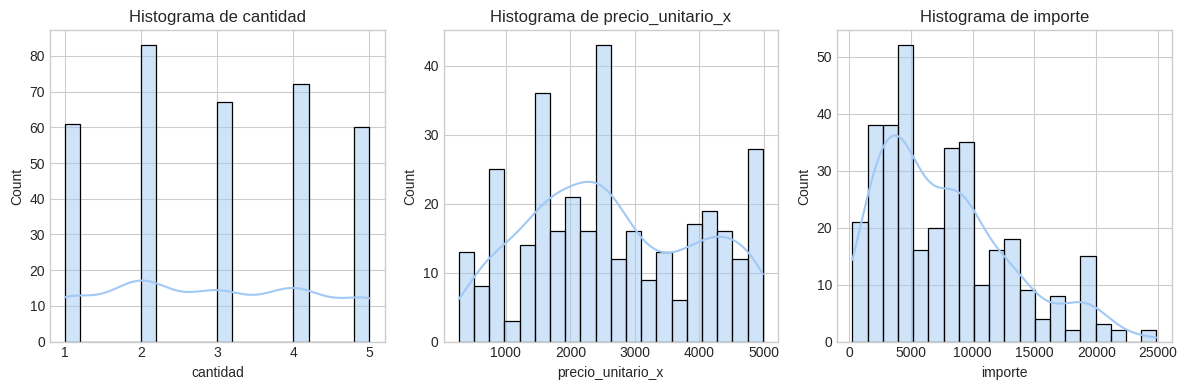

In [14]:
cols_numericas = ['cantidad', 'precio_unitario_x', 'importe']

plt.figure(figsize=(12,4))
for i, col in enumerate(cols_numericas):
    plt.subplot(1,3,i+1)
    sns.histplot(analisis_relacional[col], bins=20, kde=True)
    plt.title(f'Histograma de {col}')
plt.tight_layout()
plt.show()

***1. Histograma de cantidad:***
- **Nos dice cu치ntas ventas totales (el eje Y, "Count") se hicieron para cada cantidad de producto (el eje X: 1, 2, 3, 4, o 5). Podemos ver la frecuencia de cada cantidad. Por ejemplo, la barra en "1" nos dice cu치ntas transacciones incluyeron solo un art칤culo.**

***2. Histograma de precio_unitario_x:***
- **Este gr치fico toma todos los precios unitarios y los agrupa en rangos (las barras). Nos dice qu칠 rangos de precios son los m치s comunes. La distribuci칩n no es simple. Tiene varios "picos". Hay un grupo grande de productos con precios bajos (alrededor de 1000), otro grupo notable (alrededor de 2500) y algunos picos m치s peque침os a precios m치s altos.**

***3. Histograma de importe:***
- **Este nos dice cu치ntas ventas cayeron en diferentes rangos del importe total (por ejemplo, cu치ntas ventas fueron entre 0 y 2500, cu치ntas entre 2500 y 5000, etc.). La gran mayor칤a de las ventas est치n agrupadas en la izquierda, en los importes m치s bajos. A medida que el importe total aumenta (hacia la derecha), hay cada vez menos ventas. Esto se llama sesgo a la derecha.**

## ***Boxplots por categor칤as***

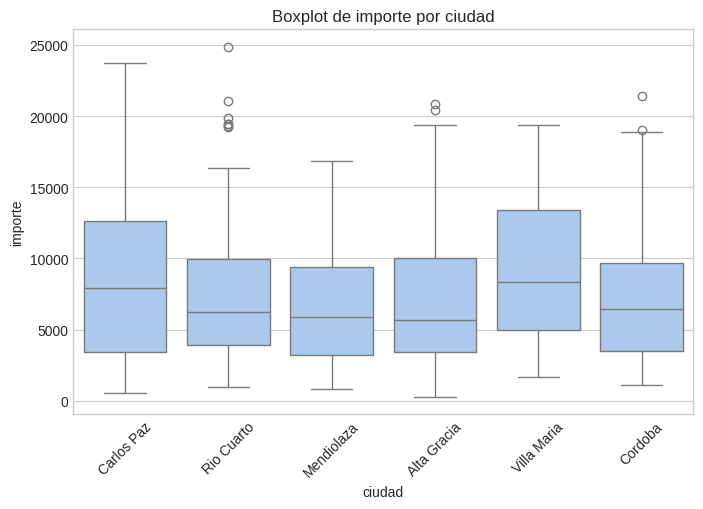

In [5]:
# 1. Importe por ciudad
plt.figure(figsize=(8,5))
sns.boxplot(x='ciudad', y='importe', data=analisis_relacional)
plt.title('Boxplot de importe por ciudad')
plt.xticks(rotation=45)
plt.show()

***Lo que muestra cada caja:***
- **L칤nea horizontal: Es la mediana (o el percentil 50). La mitad de las ventas de esa ciudad est치n por encima y la otra mitad por debajo de ese valor.**
- **La caja: Representa el 50% central de todas las ventas.**
- **Los puntos (Outliers): Son valores at칤picos o ventas espor치dicamente muy grandes (o muy peque침as) que se salen del patr칩n normal.**

***Comparaci칩n de Ciudades***
- **Carlos Paz y Villa Mar칤a generalmente tienen las ventas m치s grandes, ya que sus medianas son las m치s altas (la l칤nea central est치 m치s arriba).**
- **R칤o Cuarto, Cordoba y Alta Gracia tienen una alta concentraci칩n de valores at칤picos, lo que significa que de vez en cuando tienen ventas mucho m치s grandes que el resto de sus transacciones.**

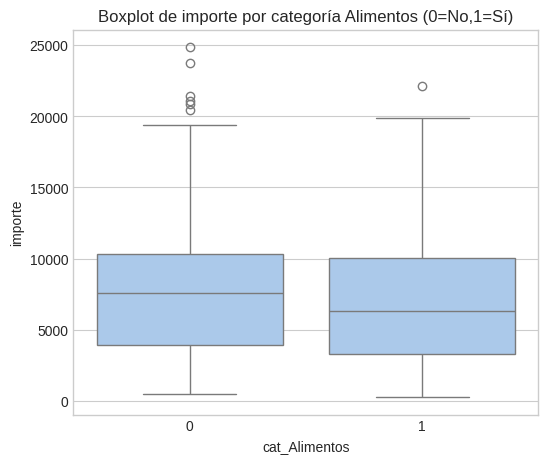

In [6]:
# 2. Importe por categor칤a Alimentos
plt.figure(figsize=(6,5))
sns.boxplot(x='cat_Alimentos', y='importe', data=analisis_relacional)
plt.title('Boxplot de importe por categor칤a Alimentos (0=No,1=S칤)')
plt.show()

**Este diagrama de caja compara el importe total de las ventas (eje Y) bas치ndose en si la transacci칩n conten칤a productos de la categor칤a Alimentos (eje X: 0=No y 1=S칤).**
- **Mediana (l칤nea central): El valor de venta t칤pico (la mediana) de las transacciones sin alimentos (0) es ligeramente m치s alto que el de las transacciones con alimentos (1).**
- **Dispersi칩n (la caja): El 50% central de las ventas sin alimentos (0) tiene una dispersi칩n ligeramente mayor.**
- **Valores Extremos (puntos): Ambos grupos tienen valores at칤picos (ventas muy grandes), pero la categor칤a sin alimentos (0) tiene las ventas m치s grandes registradas (cerca de 25.000) y m치s casos de ventas extremas.**

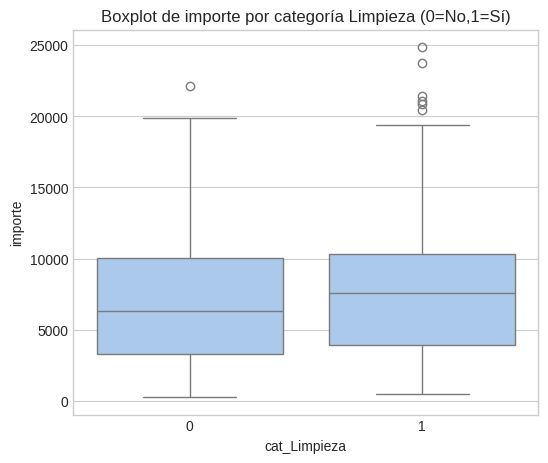

In [7]:
# 3. Importe por categor칤a Limpieza
plt.figure(figsize=(6,5))
sns.boxplot(x='cat_Limpieza', y='importe', data=analisis_relacional)
plt.title('Boxplot de importe por categor칤a Limpieza (0=No,1=S칤)')
plt.show()


**Este diagrama de caja compara el importe total de las ventas (eje Y) seg칰n si la transacci칩n incluye o no productos de la categor칤a Limpieza (0=No, 1=S칤).**
- **Mediana (L칤nea central): La venta t칤pica (mediana) de las transacciones que s칤 incluyen art칤culos de limpieza (1) es m치s alta que la de las que no los incluyen (0). Esto sugiere que la inclusi칩n de productos de limpieza tiende a aumentar ligeramente el valor total de la venta.**
- **Dispersi칩n (Caja): El 50% central de las ventas para la categor칤a con limpieza (1) se encuentra en un rango de valores m치s altos que el grupo sin limpieza (0).**
- **Valores Extremos (Outliers): Ambos grupos tienen ventas excepcionalmente grandes, pero el grupo con limpieza (1) registra los importes m치s altos de manera ocasional.**

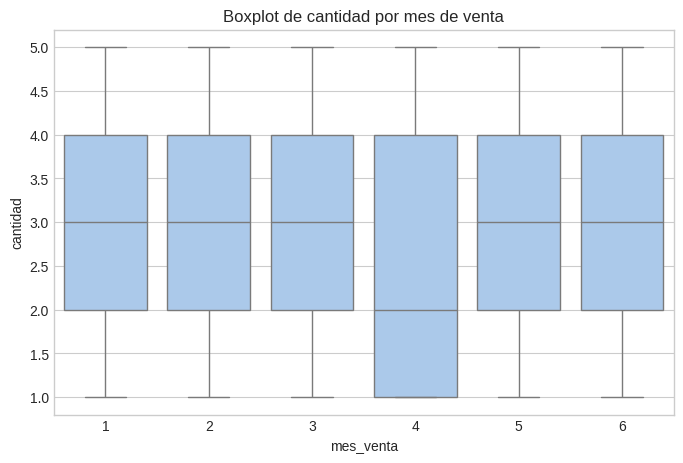

In [8]:
# 4. Cantidad por mes de venta
plt.figure(figsize=(8,5))
sns.boxplot(x='mes_venta', y='cantidad', data=analisis_relacional)
plt.title('Boxplot de cantidad por mes de venta')
plt.show()

**Este diagrama de caja (Boxplot) compara la distribuci칩n de la cantidad de art칤culos vendidos por transacci칩n (eje Y) a lo largo de los seis meses (eje X).**

**An치lisis de la Cantidad de Art칤culos por Mes:**
- **Similitud (Mediana): La caracter칤stica m치s notable es la uniformidad. La cantidad mediana vendida por transacci칩n (la l칤nea central) es de 3 unidades en todos los meses (1 al 6).**
- **Diferencia (Dispersi칩n): El mes 4 se destaca. Aunque su mediana es la misma, su caja (el 50% central de las ventas) es mucho m치s ancha y baja que las dem치s.**
- **En la mayor칤a de los meses (1, 2, 3, 5, 6), el 50% central de las ventas se encuentra entre 2 y 4 unidades.**
- **En el mes 4, el 50% central de las ventas se extiende entre 1 y 4 unidades.**

**Conclusi칩n:**
- **La caja m치s ancha del mes 4 indica una mayor variabilidad o dispersi칩n en las cantidades vendidas en ese mes. Muestra que, si bien la cantidad m치s com칰n (mediana) sigue siendo 3, las ventas en el mes 4 fueron m치s propensas a incluir solo 1 art칤culo que en cualquier otro mes.**

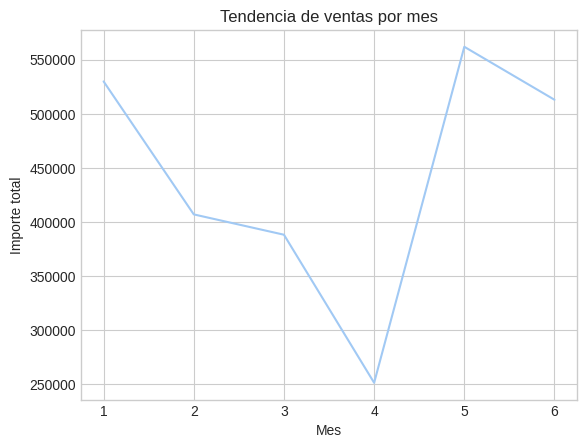

In [20]:
# Total de ventas por mes
ventas_por_mes = analisis_relacional.groupby('mes_venta')['importe'].sum()
sns.lineplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title('Tendencia de ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Importe total')
plt.show()


**Este gr치fico de l칤neas muestra la evoluci칩n de las ventas totales (importe total) a lo largo de los seis meses, lo que es ideal para identificar r치pidamente la tendencia y los cambios a lo largo del tiempo.**

**Tendencia observada:**
- **Declive Inicial:** Las ventas comienzan altas en el Mes 1 y caen progresivamente hasta alcanzar el punto m치s bajo en el Mes 4 (aproximadamente 250.000).
- **Pico Dram치tico:** A esto le sigue un aumento muy dr치stico en el Mes 5, donde se registra el pico m치ximo de ventas para todo el per칤odo (aproximadamente 560.000).
- **Cierre:** El per칤odo termina con una ligera disminuci칩n en el Mes 6.

**Esta visualizaci칩n es la contraparte en formato de tendencia del primer gr치fico de barras que analizamos.**

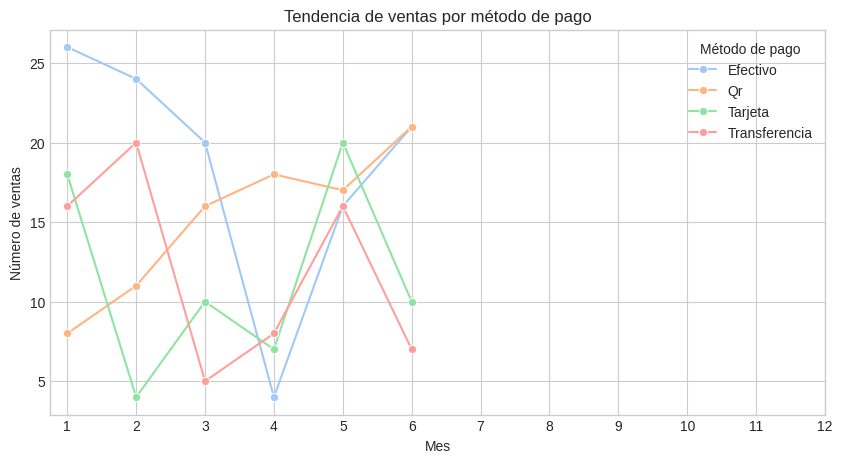

In [24]:
# Agrupar por mes y sumar ventas por m칠todo de pago
pagos_por_mes = analisis_relacional.groupby('mes_venta')[['pago_Efectivo','pago_Qr','pago_Tarjeta','pago_Transferencia']].sum()

# Gr치fico de tendencia
plt.figure(figsize=(10,5))
for metodo in pagos_por_mes.columns:
    sns.lineplot(
        x=pagos_por_mes.index,
        y=pagos_por_mes[metodo],
        label=metodo.replace('pago_',''),
        marker='o'   # <-- Esto agrega los puntos
    )
    
plt.title('Tendencia de ventas por m칠todo de pago')
plt.xlabel('Mes')
plt.ylabel('N칰mero de ventas')
plt.xticks(range(1,13))
plt.legend(title='M칠todo de pago')
plt.show()


**Este gr치fico de l칤neas muestra la evoluci칩n de la cantidad de ventas (eje Y) a lo largo de los seis meses para los cuatro m칠todos de pago (la leyenda). Es excelente para ver c칩mo la preferencia de pago ha cambiado con el tiempo.**

**Tendencias Clave por M칠todo de Pago:**
- **Efectivo (Azul Claro):** Comienza como el m칠todo claramente dominante en el Mes 1. Sin embargo, su uso decae dr치sticamente hasta el Mes 4, para luego repuntar ligeramente, mostrando una clara tendencia a la baja en la preferencia.
- **QR (Naranja):** Muestra una tendencia general de crecimiento constante a lo largo del periodo, pasando de ser el menos usado en el Mes 1 a convertirse en el m칠todo m치s frecuente en el Mes 6.
- **Tarjeta (Verde) y Transferencia (Rosa):** Ambos m칠todos son los m치s vol치tiles, experimentando picos y ca칤das muy pronunciadas, lo que sugiere un uso menos estable o m치s dependiente de factores puntuales.